<a href="https://colab.research.google.com/github/PineBiotech/omicslogic/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-means in python:**

The similarity between data points is called “distance” because when we plot statistical properties they will reflect spatial similarity and it can be measured differently, thus depending on the chosen distance measurement the clustering results will also be different. A ‘’distance’’ on the plot is derived from statistical models and data transformation. 

It is used mainly in unsupervised machine learning and is effective for finding hidden groups in the data, but also create the framework for finer classification. 

A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”. A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters. Another important term is “linkage”. Linkage defines proximity between any two clusters at every step of a clustering algorithm and is defined by the metric distance on the plot. Clustering can be used for many areas of data analysis including hidden groups discovery, data compression, and forming unknown classes or labelling the unlabelled data. As we said before clustering can create classes but of unknown groups in contrast to supervised classification in which groups are already known. 

K-means clustering is a clustering algorithm that aims to partition n  observations into k clusters.

There are 3 steps for k-means clustering:

1. Initialisation – K initial “means” (centroids) are generated at random 
2. Assignment – K clusters are created by associating each observation with the nearest centroid
3. Update – The centroid of the clusters becomes the new mean

Assignment and Update are repeated iteratively until convergence. The end result is that the sum of squared errors is minimised between points and their respective centroids. 

Remember, we will also learn about data transformation to make sure we are clustering samples and not genes!

First, let's load the packages:


In [2]:
#Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load and prepare the data - to review how to load and prepare the data for analysis you can review the previous lesson on data visualization


In [16]:
#Load Data:
data = pd.read_table("/content/sample_data/CellLines_15Genes.txt",sep='\t',header=(0))
data=data.drop(['id'], axis = 1) 

#Convert integers to floats
datafinal = data.astype(float)

Now, we can visualzie the dataset - using boxplots and PCA scatterplot

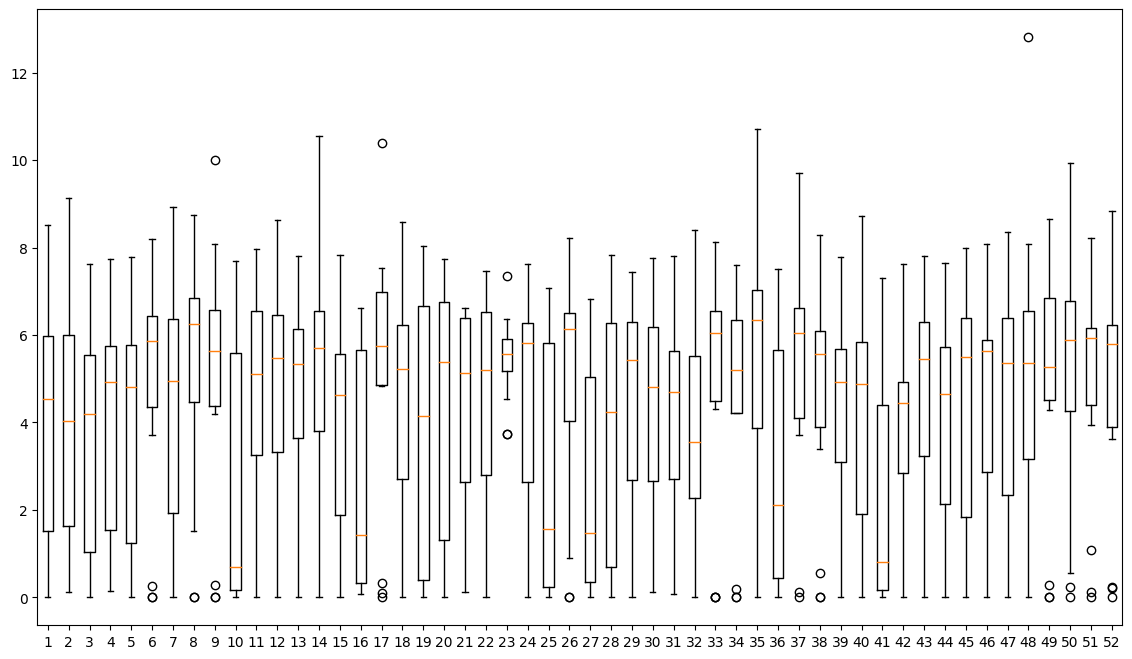

In [15]:
#Boxplot of the data
dataT = datafinal.transpose()
fig1, ax1 = plt.subplots()
ax1.boxplot(dataT)

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.figsize'] = [14, 8]
plt.show()

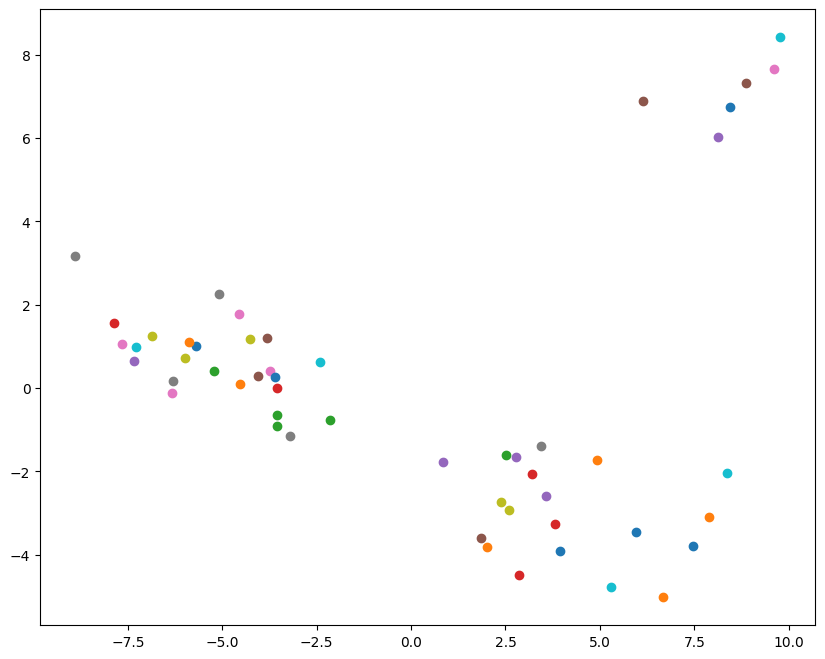

In [49]:
#visualize data using PCA:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(dataT)
pca_2d = pca.transform(dataT)
 

fig1, ax1 = plt.subplots()

for i in range(0, pca_2d.shape[0]):
  plt.scatter(pca_2d[i,0],pca_2d[i,1])

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

Now we can apply k-means clustering to the data


In [41]:
#Apply k-means to data:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataT)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

labels = kmeans.predict(dataT)
centroids = kmeans.cluster_centers_
colors = map(lambda x: colmap[x+1], labels)


Let's add labels from clustering to our scatterplot from PCA

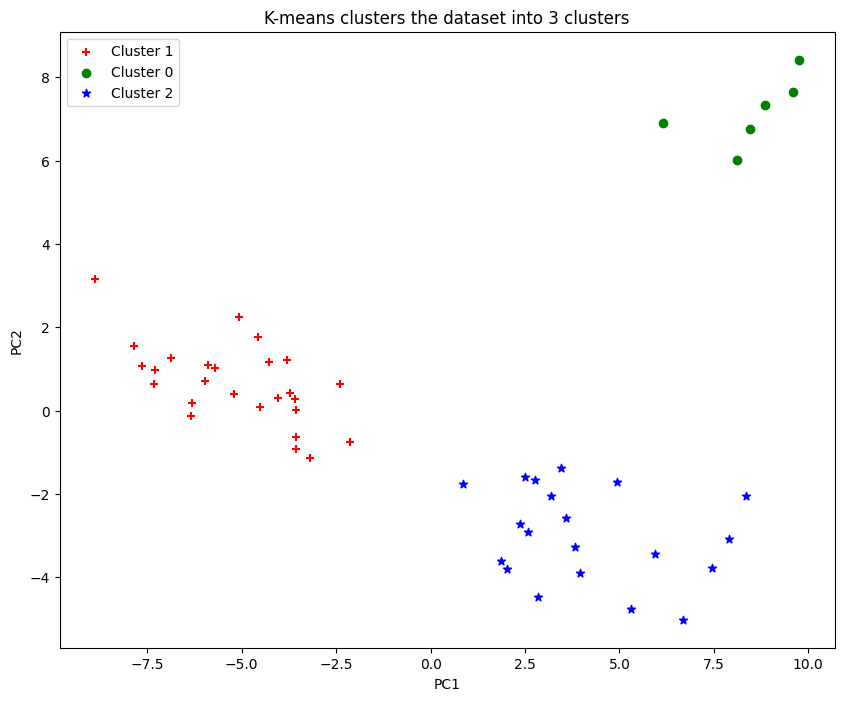

In [47]:
plt.figure(figsize=(10, 8))

for i in range(0, pca_2d.shape[0]):
  if kmeans.labels_[i] == 1:
    c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1], c='r', marker='+')
  elif kmeans.labels_[i] == 0:
    c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
  elif kmeans.labels_[i] == 2:
    c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')

#Add labels to PCA scatterplot:

plt.legend([c1, c2, c3],['Cluster 1', 'Cluster 0', 'Cluster 2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means clusters the dataset into 3 clusters')
plt.show()
